<a href="https://colab.research.google.com/github/etorres14/KaggleCompetition_Titanic_Classication/blob/main/Kaggle_Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic Project

### Edward Torres

## Objective
---

You'll be competing in Kaggle's [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) Competition. You can download the datasets, and read the requirements of the competition using the associated link.<br>



## Importing Dependencies / Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
pd.DataFrame(titanic_df.isnull().sum().sort_values(ascending = False))

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [ ]:
pd.DataFrame(titanic_df.isnull().sum().sort_values(ascending = False)/titanic_df.shape[0])

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Initial Data Cleaning: Dealing with missing Values

**Cabin**

In [ ]:
# with 78% of the data missing from the column, I decided drop the Cabin column.

titanic_df = titanic_df.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

**Embarked**

In [ ]:
# check the two rows of data where Embarked is empty

titanic_df[titanic_df.Embarked.isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# After a quick google search, I learned that both passangers Embarked from Southampton.
titanic_df.Embarked = titanic_df.Embarked.fillna("S")

**Age**

For Age I first tried using the average age in my data set in place of the missing data. I felt there was a more efficient way to do this. I learned that depending on the peron's class, title or sex, the average age might differ. So I then decided to create a column for a person's title to then use that in combination with thier class to get a better estimate of age.

Creating Title column using name column

In [ ]:
# The Name column consists of the person's last name, followed by their title, and first name. 
# Using this information I want to create a function that will extract the title.

def get_title(input):
  title = input.split()[1]
  return title

#applying function to create Title column
titanic_df["Title"] = titanic_df.Name.apply(get_title)
test["Title"] = test.Name.apply(get_title)

In [ ]:
# Taking a look at the different Titles.
# I can probably generalize this to cut down the number of unique values.
titanic_df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [ ]:
# Look at frequency of titles
# Mr. Miss. Mrs. Master. the most common
titanic_df.Title.value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Title, dtype: int64

In [ ]:
def generalize_title(input):
  if input == "Mrs.":
    return "Mrs."
  elif input == "Mr.":
    return "Mr."
  elif input == "Miss." or input == "Ms.":
    return "Miss."
  elif input == "Master.":
    return "Master."
  else:
    return "Other"

titanic_df.Title = titanic_df.Title.apply(generalize_title)
test.Title = test.Title.apply(generalize_title)

In [ ]:
titanic_df[titanic_df.Age.isnull()==True].Title.value_counts()

Mr.        117
Miss.       36
Mrs.        17
Master.      4
Other        3
Name: Title, dtype: int64

In [ ]:
# Just as I thought, the title further impacts the average age.
titanic_df.groupby(["Pclass","Title"]).Age.median()

Pclass  Title  
1       Master.     4.0
        Miss.      30.0
        Mr.        40.0
        Mrs.       43.0
        Other      44.5
2       Master.     1.0
        Miss.      24.0
        Mr.        31.0
        Mrs.       32.0
        Other      35.5
3       Master.     4.0
        Miss.      18.0
        Mr.        26.0
        Mrs.       31.5
        Other      30.0
Name: Age, dtype: float64

*Filling in missing age data*

In [ ]:
# I want to fill the empty data in the Age column with the average age based on title and class.
# First I want to calculate those averages.

#Other & Master
# Due to the little data, we will just use the overall average age for those with the title Other and Master respectively.
other_avg_age = titanic_df[titanic_df.Title == "Other"].Age.mean()
master_avg_age = titanic_df[titanic_df.Title == "Master."].Age.mean()

#Mr.
mr1_avg_age = titanic_df[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 1)].Age.mean()
mr2_avg_age = titanic_df[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 2)].Age.mean()
mr3_avg_age = titanic_df[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 3)].Age.mean()


#Mrs.
mrs1_avg_age = titanic_df[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 1)].Age.mean()
mrs2_avg_age = titanic_df[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 2)].Age.mean()
mrs3_avg_age = titanic_df[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 3)].Age.mean()

#Miss.
miss1_avg_age = titanic_df[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 1)].Age.mean()
miss2_avg_age = titanic_df[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 2)].Age.mean()
miss3_avg_age = titanic_df[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 3)].Age.mean()

In [ ]:
# Filling in missing age Data in titanic_df 

#Other & Master
titanic_df.loc[titanic_df.Title == "Other", "Age"] = titanic_df.loc[titanic_df.Title == "Other", "Age"].fillna(other_avg_age)
titanic_df.loc[titanic_df.Title == "Master.", "Age"] = titanic_df.loc[titanic_df.Title == "Master.", "Age"].fillna(master_avg_age)

#Mr.
titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 1 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 1 ),"Age"].fillna(mr1_avg_age)
titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 2 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 2 ),"Age"].fillna(mr2_avg_age)
titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 3 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mr.")&(titanic_df.Pclass == 3 ),"Age"].fillna(mr3_avg_age)

#Mrs.
titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 1 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 1 ),"Age"].fillna(mrs1_avg_age)
titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 2 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 2 ),"Age"].fillna(mrs2_avg_age)
titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 3 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Mrs.")&(titanic_df.Pclass == 3 ),"Age"].fillna(mrs3_avg_age)

#Miss.
titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 1 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 1 ),"Age"].fillna(miss1_avg_age)
titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 2 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 2 ),"Age"].fillna(miss2_avg_age)
titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 3 ), "Age"] = titanic_df.loc[(titanic_df.Title == "Miss.")&(titanic_df.Pclass == 3 ),"Age"].fillna(miss3_avg_age)

In [ ]:
# Filling in missing age data in testing data

#Other & Master
test.loc[test.Title == "Other", "Age"] = test.loc[test.Title == "Other", "Age"].fillna(other_avg_age)
test.loc[test.Title == "Master.", "Age"] = test.loc[test.Title == "Master.", "Age"].fillna(master_avg_age)

#Mr.
test.loc[(test.Title == "Mr.")&(test.Pclass == 1 ), "Age"] = test.loc[(test.Title == "Mr.")&(test.Pclass == 1 ),"Age"].fillna(mr1_avg_age)
test.loc[(test.Title == "Mr.")&(test.Pclass == 2 ), "Age"] = test.loc[(test.Title == "Mr.")&(test.Pclass == 2 ),"Age"].fillna(mr2_avg_age)
test.loc[(test.Title == "Mr.")&(test.Pclass == 3 ), "Age"] = test.loc[(test.Title == "Mr.")&(test.Pclass == 3 ),"Age"].fillna(mr3_avg_age)

#Mrs.
test.loc[(test.Title == "Mrs.")&(test.Pclass == 1 ), "Age"] = test.loc[(test.Title == "Mrs.")&(test.Pclass == 1 ),"Age"].fillna(mrs1_avg_age)
test.loc[(test.Title == "Mrs.")&(test.Pclass == 2 ), "Age"] = test.loc[(test.Title == "Mrs.")&(test.Pclass == 2 ),"Age"].fillna(mrs2_avg_age)
test.loc[(test.Title == "Mrs.")&(test.Pclass == 3 ), "Age"] = test.loc[(test.Title == "Mrs.")&(test.Pclass == 3 ),"Age"].fillna(mrs3_avg_age)

#Miss.
test.loc[(test.Title == "Miss.")&(test.Pclass == 1 ), "Age"] = test.loc[(test.Title == "Miss.")&(test.Pclass == 1 ),"Age"].fillna(miss1_avg_age)
test.loc[(test.Title == "Miss.")&(test.Pclass == 2 ), "Age"] = test.loc[(test.Title == "Miss.")&(test.Pclass == 2 ),"Age"].fillna(miss2_avg_age)
test.loc[(test.Title == "Miss.")&(test.Pclass == 3 ), "Age"] = test.loc[(test.Title == "Miss.")&(test.Pclass == 3 ),"Age"].fillna(miss3_avg_age)

## Exploring Data

In [ ]:
titanic_df.drop("PassengerId", axis = 1).groupby("Survived").describe().T

Survived               0           1
Pclass count  549.000000  342.000000
       mean     2.531876    1.950292
       std      0.735805    0.863321
       min      1.000000    1.000000
       25%      2.000000    1.000000
       50%      3.000000    2.000000
       75%      3.000000    3.000000
       max      3.000000    3.000000
Age    count  549.000000  342.000000
       mean    30.234726   28.140728
       std     12.916457   14.444438
       min      1.000000    0.420000
       25%     22.000000   18.000000
       50%     28.646119   28.323059
       75%     36.788889   36.591667
       max     74.000000   80.000000
SibSp  count  549.000000  342.000000
       mean     0.553734    0.473684
       std      1.288399    0.708688
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    1.000000
       max      8.000000    4.000000
Parch  count  549.000000  342.000000
       mean     0.329690    0.464912
       std      0.823166    0.771712
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      0.000000    1.000000
       max      6.000000    5.000000
Fare   count  549.000000  342.000000
       mean    22.117887   48.395408
       std     31.388207   66.596998
       min      0.000000    0.000000
       25%      7.854200   12.475000
       50%     10.500000   26.000000
       75%     26.000000   57.000000
       max    263.000000  512.329200

### Exploring Age

In [ ]:
titanic_df.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.234726,12.916457,1.00,22.0,28.646119,36.788889,74.0
1,342.0,28.140728,14.444438,0.42,18.0,28.323059,36.591667,80.0


In [ ]:
titanic_df.groupby(["Survived","Pclass"])["Age"].describe()

count       mean        std    min        25%        50%  \
Survived Pclass                                                             
0        1        80.0  43.221626  13.692406   2.00  36.591667  41.629412   
         2        97.0  33.491791  11.701709  16.00  25.000000  32.000000   
         3       372.0  26.592556  10.891851   1.00  20.000000  28.646119   
1        1       136.0  35.925850  13.166662   0.92  26.000000  36.000000   
         2        87.0  26.026178  14.564334   0.67  18.000000  28.000000   
         3       119.0  20.789378  11.061485   0.42  16.093284  20.000000   

                       75%   max  
Survived Pclass                   
0        1       51.250000  71.0  
         2       38.000000  70.0  
         3       30.000000  74.0  
1        1       43.250000  80.0  
         2       34.000000  62.0  
         3       28.646119  63.0

Certain Age intervals might give us more insight. It is said that women and children took priority in rescue. Let's see if this is true. We'lll check for infants and compare this to elderly first.

- Infants

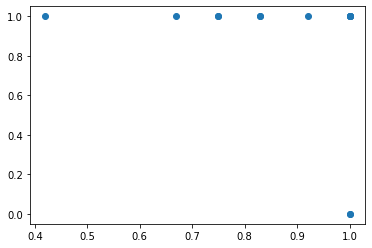

In [ ]:
infant = titanic_df[(titanic_df["Age"] < 2)]
plt.scatter(infant.Age, infant.Survived);

In [ ]:
infant.groupby("Survived").Age.value_counts()

Survived  Age 
0         1.00    2
1         1.00    5
          0.75    2
          0.83    2
          0.42    1
          0.67    1
          0.92    1
Name: Age, dtype: int64

- Elderly

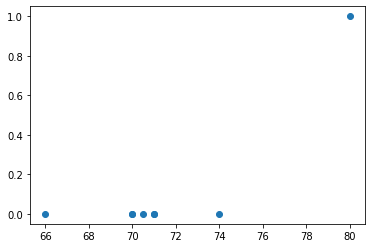

In [ ]:
elderly = titanic_df[ (titanic_df["Age"] > 65)]

plt.scatter(elderly.Age, elderly.Survived);

In [ ]:
elderly.groupby("Survived").Age.value_counts()

Survived  Age 
0         70.0    2
          71.0    2
          66.0    1
          70.5    1
          74.0    1
1         80.0    1
Name: Age, dtype: int64

In [ ]:
# Lets break our age column up into different age categories

# First lets create a function to designate a category for different ages
def ageLabel(age):
  if (age < 2):
    return "infant"
  elif (age >= 2) & (age <  5):
    return "toddler"
  elif (age >= 5) & (age < 13):
    return "child"
  elif (age >=13) & (age < 20):
    return "teen" 
  elif (age >= 20) & (age < 40):
    return "adult"
  elif (age >= 40) & (age < 65):
    return "middle age adult"
  elif age>=65:
    return "senior adult"
  else:
    return None

# apply function 
titanic_df["Age_Category"] = titanic_df["Age"].apply(ageLabel)
test["Age_Category"] = test["Age"].apply(ageLabel)

In [ ]:
titanic_df.groupby("Survived")["Age_Category"].value_counts()

Survived  Age_Category    
0         adult               331
          middle age adult    107
          teen                 70
          child                16
          toddler              13
          senior adult         10
          infant                2
1         adult               168
          middle age adult     73
          teen                 58
          toddler              17
          child                13
          infant               12
          senior adult          1
Name: Age_Category, dtype: int64

### Exploring Parch and  SibSp

Did having family onboard have an impact on a person's survival rate?

In [ ]:
titanic_df.groupby(["Parch"]).Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

Here we notice that those whitout Children/Parents had a higher death to survival ratio.

In [ ]:
titanic_df.groupby(["SibSp"]).Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

Here we notice that those whitout sibblings/spouse had a higher death to survival ratio.

In [ ]:
# I want to generalize and turn the column into binary data (has sibbling/spouse and has parents/children)

# Create funtion
def hasMember(input):
  if input == 0:
    return 0
  if input > 0:
    return 1

# apply function to columns
titanic_df.SibSp = titanic_df.SibSp.apply(hasMember)
test.SibSp = test.SibSp.apply(hasMember)

titanic_df.Parch = titanic_df.Parch.apply(hasMember)
test.Parch = test.Parch.apply(hasMember)

In [ ]:
titanic_df.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.075177
SibSp          0.115867
Parch          0.147408
Fare           0.257307
Name: Survived, dtype: float64

## Categorical Encoding

#### Ordinal Data

In [ ]:
# create a dictionary pairs data with an integer.
scale_mapper = {"male":0, "female":1}

#replacing data with integers
titanic_df["Sex"] = titanic_df["Sex"].replace(scale_mapper)
test["Sex"] = test["Sex"].replace(scale_mapper)

#### Nonimal Data

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

**Embarked**

In [ ]:
titanic_df = encode_and_bind(titanic_df, "Embarked")
test = encode_and_bind(test, "Embarked")

**Title**

In [ ]:
titanic_df = encode_and_bind(titanic_df, "Title")
test = encode_and_bind(test, "Title")

**Age_Category**

In [ ]:
titanic_df = encode_and_bind(titanic_df, "Age_Category")
test = encode_and_bind(test, "Age_Category")

## Check for collinearity

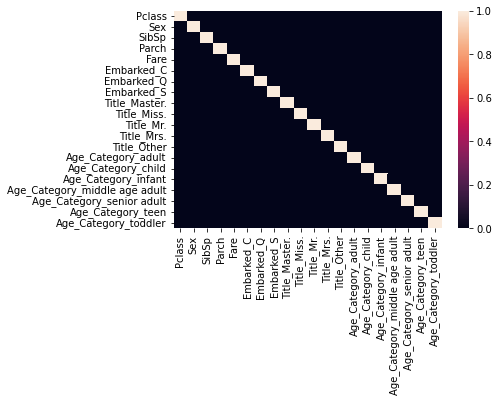

In [ ]:
sns.heatmap(titanic_df.drop(["PassengerId", "Name", "Survived","Ticket","Age"], axis = 1).corr() > .7)

## Data Processing


In [ ]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(["PassengerId", "Name", "Survived","Ticket","Age"], axis = 1)
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

## ML Models

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Model Validation**



In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.8435754189944135

### Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

**Model Validation**

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.7597765363128491

#### Tuning Parameters

In [ ]:
# 

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 10)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 22, 34, 46, 58, 71,
                                                      83, 95, 107, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 8, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'min_samples_split': [2, 6, 8, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 34, 'bootstrap': True}  



In [ ]:
#Here I played with the parameters a little more to generate one with the best acuracy score.

randmf = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 10, bootstrap=False) 
randmf.fit( X_train, y_train) 

y_pred = randmf.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.8324022346368715

## Generating Predictions for Test data in order to Submit to Kaggle Compettion

In [ ]:
#Really quickly check my data. I need to see if all columns are there and if I have missing data.
test.isnull().sum()

PassengerId                      0
Pclass                           0
Name                             0
Sex                              0
Age                              0
SibSp                            0
Parch                            0
Ticket                           0
Fare                             1
Embarked_C                       0
Embarked_Q                       0
Embarked_S                       0
Title_Master.                    0
Title_Miss.                      0
Title_Mr.                        0
Title_Mrs.                       0
Title_Other                      0
Age_Category_adult               0
Age_Category_child               0
Age_Category_infant              0
Age_Category_middle age adult    0
Age_Category_senior adult        0
Age_Category_teen                0
Age_Category_toddler             0
dtype: int64

In [ ]:
# There was one data point missing for Fare, so I can just use the average of my data set inplace of it.
test.Fare.fillna(test.Fare.mean(),inplace=True)

In [ ]:
# Generating predicted outcomes using Kaggle test data
input = test.drop(["PassengerId", "Name","Ticket","Age"], axis = 1)

output = randmf.predict(input)

In [ ]:
# Create dataframe with PassangerId and predicted outcomes.
submission = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": output})

In [ ]:
# Genereate CSV to submit to Kaggle
submission.to_csv("titanic_submission.csv", index = False)